<a href="https://colab.research.google.com/github/bquijada935/COGS108_Repo/blob/main/Neural_Network_Project_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can find a link to the dataset we are using [here](https://huggingface.co/datasets/julien-c/titanic-survival).

# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv("hf://datasets/julien-c/titanic-survival/titanic.csv")
data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## Data Preprocessing

In [ ]:
data = data.drop(columns = ['Name'])
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

In [ ]:
data['Family Size']= data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard'] + 1
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,1


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,1


In [ ]:
data['Travel Alone']= np.where(data['Family Size'] == 1, '1', '0')
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,1,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,1,1


# Neural Network Model

In [ ]:
model2 = copy.deepcopy(data)
model2

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family Size,Travel Alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,1,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...,...
882,0,2,1,27.0,0,0,13.0000,1,1
883,1,1,0,19.0,0,0,30.0000,1,1
884,0,3,0,7.0,1,2,23.4500,4,0
885,1,1,1,26.0,0,0,30.0000,1,1


In [ ]:
scaler = MinMaxScaler()
X = model2.drop(['Pclass'], axis=1)
y = model2['Pclass']
y = pd.get_dummies(y, columns=['Pclass']).astype(int)
X = scaler.fit_transform(X)
y.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
model2 = Sequential()

model2.add(Dense(units = 128, activation = 'relu', input_dim = X.shape[1]))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 3, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.001,
    patience=15,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
history = model2.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 100, callbacks = [early_stopping], verbose = 1)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5195 - loss: 1.0302
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5982 - loss: 0.9018
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - loss: 0.8347
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss: 0.7432
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7190 - loss: 0.6681
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7016 - loss: 0.6732
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7478 - loss: 0.5796
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5924
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.5381
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.5245
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7875 - loss: 0.5487
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [ ]:
history.history

{'accuracy': [0.5472496747970581,
  0.6220028400421143,
  0.665726363658905,
  0.7080394625663757,
  0.727785587310791,
  0.7390691041946411,
  0.7503526210784912,
  0.7658674120903015,
  0.7771509289741516,
  0.7926657199859619,
  0.799717903137207,
  0.794076144695282,
  0.8011283278465271,
  0.8180536031723022,
  0.7968970537185669,
  0.8095909953117371,
  0.8067700862884521,
  0.8053596615791321,
  0.8095909953117371,
  0.8138222694396973,
  0.8180536031723022,
  0.8152326941490173,
  0.8152326941490173,
  0.8194640278816223,
  0.8222849369049072,
  0.8321579694747925,
  0.8265162110328674,
  0.8349788188934326,
  0.8392101526260376,
  0.8377997279167175,
  0.8377997279167175,
  0.8251057863235474,
  0.8335683941841125,
  0.8335683941841125,
  0.8349788188934326,
  0.8462623357772827,
  0.8363893032073975,
  0.8462623357772827,
  0.8392101526260376,
  0.8377997279167175,
  0.8377997279167175,
  0.8448519110679626,
  0.8434414863586426,
  0.8490832448005676,
  0.8392101526260376,
  

In [ ]:
yhat_test = model2.predict(X_test.astype(float))
yhat_test = (yhat_test > 0.5).astype(int)
yhat_test = np.argmax(yhat_test, axis=1)
y_test_ = np.argmax(y_test.values, axis=1)

yhat_train = model2.predict(X_train.astype(float))
yhat_train = (yhat_train > 0.5).astype(int)
yhat_train = np.argmax(yhat_train, axis=1)
y_train_ = np.argmax(y_train.values, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print('Training Report:')
print(classification_report(y_train_, yhat_train))

print('Testing Report:')
print(classification_report(y_test_, yhat_test))

Training Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       176
           1       0.89      0.47      0.61       149
           2       0.87      0.96      0.91       384

    accuracy                           0.85       709
   macro avg       0.86      0.80      0.80       709
weighted avg       0.86      0.85      0.84       709

Testing Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        40
           1       0.85      0.49      0.62        35
           2       0.89      0.94      0.92       103

    accuracy                           0.85       178
   macro avg       0.84      0.79      0.80       178
weighted avg       0.86      0.85      0.84       178



Test Confusion Matrix:


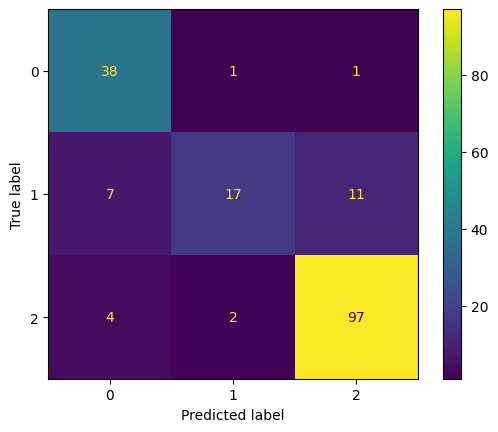

In [ ]:
print('Test Confusion Matrix:')
ConfusionMatrixDisplay.from_predictions(y_test_, yhat_test)

Train Confusion Matrix:


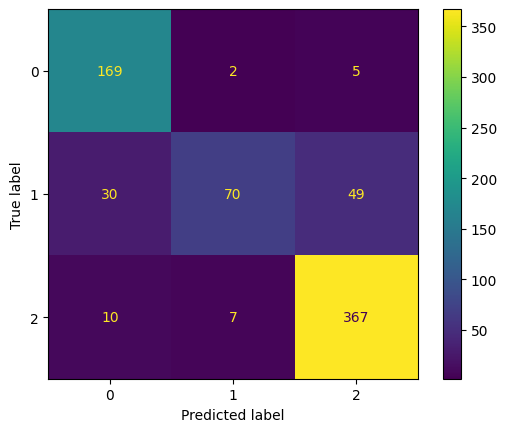

In [ ]:
print('Train Confusion Matrix:')
ConfusionMatrixDisplay.from_predictions(y_train_, yhat_train)